In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle

In [162]:
df = pd.read_excel('../data/NBAStats.xlsx').set_index('PLAYER')
df = df[df['GP'] >= 10]
df = df[df['MIN'] >= 15]
# Perhaps a poor practice and should remove them in the scraping algorithm
df = df.drop(columns=['TEAM', 'W', 'L', 'GP', 'DREB', 'STL', 'BLK'])
df = df.astype(float)

Removes the team column from the dataframe for now. It may be added back for future analysis but as a string it causes problems for the clustering algorithm. Also dropping players who have played less than 10 games because the sample size is so small.

In [163]:
dfPlayerCol = df.reset_index()
df

,AGE,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,...,FGM%UAST,DEF RTG,%DREB,STL%,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Anthony Black,20.0,23.8,104.5,104.3,0.3,24.0,1.60,25.6,2.2,9.2,...,53.1,104.3,14.2,20.3,19.3,9.6,5.4,6.5,21.3,0.120
Bennedict Mathurin,22.0,33.1,113.2,112.2,1.0,8.0,0.92,10.2,3.9,14.4,...,38.2,112.2,21.6,13.8,10.0,11.6,9.2,8.9,34.0,0.088
Clint Capela,30.0,23.0,110.0,108.2,1.9,7.6,1.43,12.1,14.0,22.7,...,22.2,108.2,33.7,11.5,40.5,9.4,6.6,8.0,23.2,0.089
De'Aaron Fox,27.0,37.2,112.0,111.7,0.2,26.6,1.77,18.8,2.9,10.3,...,66.0,111.7,15.5,27.4,8.6,12.9,10.7,8.7,33.9,0.106
Jake LaRavia,23.0,22.8,117.0,106.8,10.2,18.6,2.12,27.7,6.5,12.4,...,21.1,106.8,19.1,20.7,17.6,10.2,7.3,7.0,23.5,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jose Alvarado,26.0,25.6,107.4,121.0,-13.5,26.8,3.50,28.7,2.0,6.8,...,47.5,121.0,10.9,34.7,10.7,10.0,8.0,11.1,31.1,0.003
Justin Champagnie,23.0,24.2,108.3,117.2,-9.0,6.8,1.18,12.0,8.8,15.0,...,29.3,117.2,23.8,28.9,25.6,10.3,9.5,8.4,27.8,0.030
Kristaps Porziņģis,29.0,27.2,112.9,109.8,3.1,9.2,2.25,9.1,4.4,17.2,...,16.4,109.8,22.6,17.0,48.5,8.5,5.5,8.4,25.6,0.096


In [164]:
features = list(df.columns)
# Removes the column titles for data processing
x = df.loc[:, features].values
# Good practice to scale the data down based on variance
x = StandardScaler().fit_transform(x) 


Feature refers to the data that you are using in ML model to make predictions. Feature engineering is the process of finding the best features for the model. 

In [165]:
variance_list = []
for n_components in range(2,len(df.columns)):
    # Dimensionality Reduction
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(x)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print(f"Variance with {n_components} components: {variance}")


Variance with 2 components: 0.42196483504358695
Variance with 3 components: 0.5268762871203743
Variance with 4 components: 0.6244454419092558
Variance with 5 components: 0.6776871302685971
Variance with 6 components: 0.7224951074643821
Variance with 7 components: 0.7566458205711337
Variance with 8 components: 0.7879909920783963
Variance with 9 components: 0.8139809644146918
Variance with 10 components: 0.8390457837309422
Variance with 11 components: 0.8604107133722241
Variance with 12 components: 0.8807372834151569
Variance with 13 components: 0.897416313807237
Variance with 14 components: 0.9136260463014971
Variance with 15 components: 0.9286695183325752
Variance with 16 components: 0.9407456751304609
Variance with 17 components: 0.9517145876537622
Variance with 18 components: 0.9610075395834863
Variance with 19 components: 0.969711790020597
Variance with 20 components: 0.9764202795420289
Variance with 21 components: 0.9812214119033239
Variance with 22 components: 0.9854582082407977
V

This helps determine how much variance in the dataset is captured as the number of components increases. This will aid in choosing the ideal number of components for dimensionality reduction.

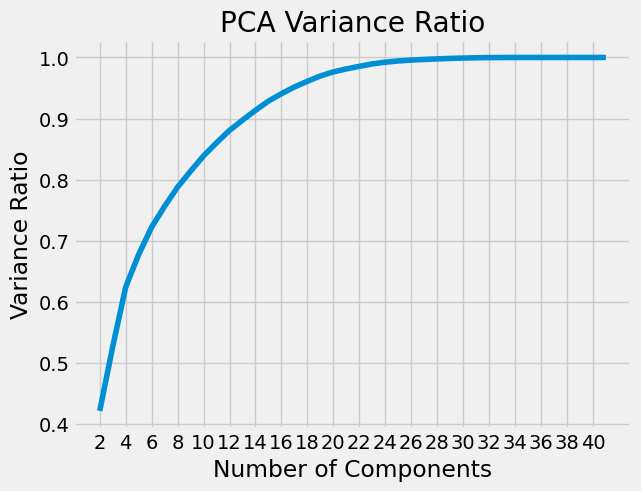

In [166]:
#Useful graph for visualization of ratio changes
plt.style.use('fivethirtyeight')
pca_fig, ax = plt.subplots()
ax.plot(range(2,len(df.columns)), variance_list)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Variance Ratio')
ax.set_xticks(np.arange(2, len(df.columns), 2))
ax.set_title('PCA Variance Ratio')
pca_fig.savefig('../images/PCA_Variance_Ratio.png')

In [167]:
from numpy import diff
diff_variance = diff(variance_list)
print(diff_variance)

[1.04911452e-01 9.75691548e-02 5.32416884e-02 4.48079772e-02
 3.41507131e-02 3.13451715e-02 2.59899723e-02 2.50648193e-02
 2.13649296e-02 2.03265700e-02 1.66790304e-02 1.62097325e-02
 1.50434720e-02 1.20761568e-02 1.09689125e-02 9.29295193e-03
 8.70425044e-03 6.70848952e-03 4.80113236e-03 4.23679634e-03
 4.05895293e-03 2.70477045e-03 2.06284525e-03 1.43890881e-03
 1.00739180e-03 9.10911708e-04 7.69632406e-04 6.18210232e-04
 4.46911951e-04 3.15652995e-04 1.10220152e-04 8.14346270e-05
 1.53415469e-05 5.04225296e-07 9.46382733e-08 5.49940637e-09
 2.53568389e-09 0.00000000e+00 0.00000000e+00]


This calculates the difference between consecutive elements in the variance_list array. Slope calculus, used to determine the "elbow point" in PCA which is where the rate of variance slows down

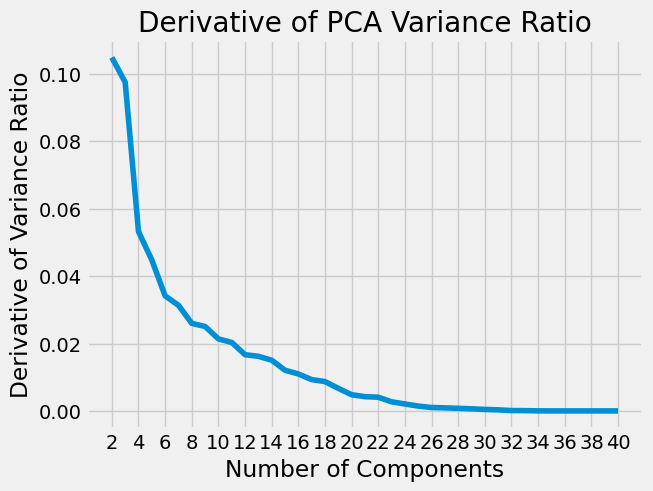

In [168]:
pca_deriv, ax = plt.subplots()
ax.plot(range(2, len(df.columns) - 1), diff_variance)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Derivative of Variance Ratio')
ax.set_xticks(np.arange(2, len(df.columns), 2))
ax.set_title('Derivative of PCA Variance Ratio')
pca_deriv.savefig('../images/PCA_Derivative.png')

Good data should have a high PCA Variance Ratio along with a low Derivative of the Variance Ratio. By using both criteria, you balance data representativeness (high variance ratio) and computational efficiency (low derivative).

In [169]:
n_comp = 16
pca = PCA(n_components=n_comp)

# Reducing the dimensions of the data
components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = [f'PC{i}' for i in range(1, n_comp + 1)])

pca_df['PLAYER'] = dfPlayerCol['PLAYER']
pca_df = pca_df[['PLAYER'] + [f'PC{i}' for i in range(1, n_comp + 1)]]
pca_df

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.21549267 0.20647216 0.10491145 0.09756915 0.05324169 0.04480798
 0.03415071 0.03134517 0.02598997 0.02506482 0.02136493 0.02032657
 0.01667903 0.01620973 0.01504347 0.01207616]
0.9407456751304609


In [170]:
x = np.column_stack([pca_df[f'PC{i}'] for i in range(1, n_comp)])

# We want a high silhouette score along with meaningful analysis
silhouette = []

for n_clusters in range(2, 32):
    kmeans = KMeans(n_clusters=n_clusters, random_state = 1)
    cluster_labels = kmeans.fit_predict(x)
    centers = kmeans.cluster_centers_
    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print(f"Silhouette Score with {n_clusters} clusters: {score}")

Silhouette Score with 2 clusters: 0.15179029077550088
Silhouette Score with 3 clusters: 0.1881017445092615
Silhouette Score with 4 clusters: 0.13311915657070733
Silhouette Score with 5 clusters: 0.12040573677760255
Silhouette Score with 6 clusters: 0.1174760539838586
Silhouette Score with 7 clusters: 0.11200043677190342
Silhouette Score with 8 clusters: 0.1057554475109922
Silhouette Score with 9 clusters: 0.1110339299870318
Silhouette Score with 10 clusters: 0.10380181040350545
Silhouette Score with 11 clusters: 0.09638542173808495
Silhouette Score with 12 clusters: 0.08807928694914587
Silhouette Score with 13 clusters: 0.0775437769318414
Silhouette Score with 14 clusters: 0.08314856886604674
Silhouette Score with 15 clusters: 0.09253107424244424
Silhouette Score with 16 clusters: 0.09408318995783495
Silhouette Score with 17 clusters: 0.09012580196714015
Silhouette Score with 18 clusters: 0.08180801931889567
Silhouette Score with 19 clusters: 0.080786249504875
Silhouette Score with 20 

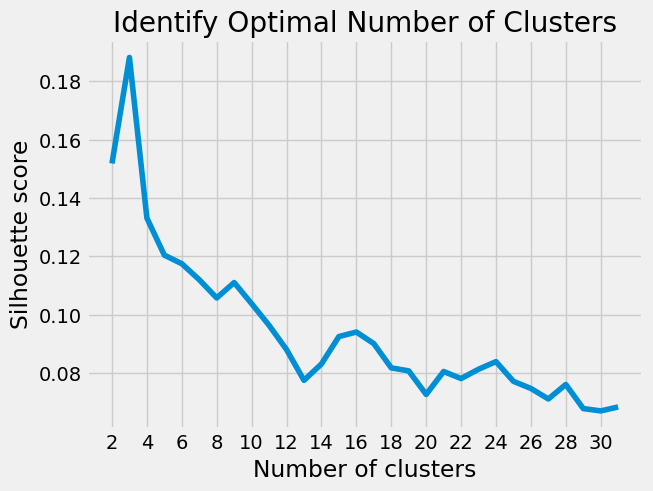

In [171]:
plt.style.use('fivethirtyeight')
silhouette_fig, ax = plt.subplots()
ax.plot(range(2,2 + len(silhouette)), silhouette)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(np.arange(2, 2+len(silhouette), 2))
ax.set_title('Identify Optimal Number of Clusters')
silhouette_fig.savefig('../images/Optimal_Clusters.png')

In [172]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1-silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print(f"for n_cluseter = {i + 2}, improvement = {improvement}") 

for n_cluseter = 3, improvement = 0.04280952379920233
for n_cluseter = 4, improvement = -0.06772103224353021
for n_cluseter = 5, improvement = -0.014665706238024212
for n_cluseter = 6, improvement = -0.0033307206700179393
for n_cluseter = 7, improvement = -0.006204497041324641
for n_cluseter = 8, improvement = -0.007032649023169801
for n_cluseter = 9, improvement = 0.005902728131077395
for n_cluseter = 10, improvement = -0.008135428142292067
for n_cluseter = 11, improvement = -0.008275389028357338
for n_cluseter = 12, improvement = -0.009192121274665288
for n_cluseter = 13, improvement = -0.011553098714095045
for n_cluseter = 14, improvement = 0.006075943545118423
for n_cluseter = 15, improvement = 0.010233397754304985
for n_cluseter = 16, improvement = 0.0017103789136305725
for n_cluseter = 17, improvement = -0.004368379024240143
for n_cluseter = 18, improvement = -0.009141684274845296
for n_cluseter = 19, improvement = -0.0011128062927132643
for n_cluseter = 20, improvement = -0.0087

C:\conda_tmp\ipykernel_26904\1289475222.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


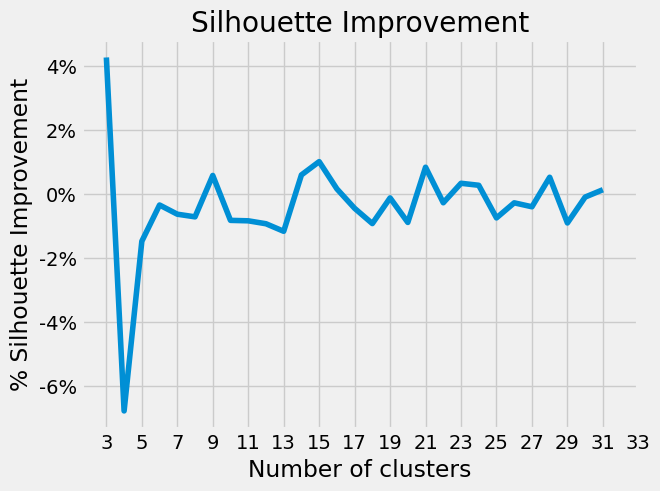

In [173]:
plt.style.use('fivethirtyeight')
silhouette_improvement_fig, ax = plt.subplots()
ax.plot(range(3, 2 + len(silhouette)), silhouette_diff)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('% Silhouette Improvement')
ax.set_xticks(np.arange(3, 4 + len(silhouette), 2))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_title('Silhouette Improvement')
silhouette_fig.savefig('../images/Silhouette_Improvement.png')

In [174]:
kmeans = KMeans(n_clusters = 15, random_state = 1)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)
with open("../models/clusterMode.sav", 'wb') as f:
    pickle.dump(kmeans, f)

In [175]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfPlayerCol['PLAYER']
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Player,Cluster
0,Anthony Black,13
1,Bennedict Mathurin,4
2,Clint Capela,3
3,De'Aaron Fox,8
4,Jake LaRavia,2


In [176]:
pd.DataFrame.to_excel(df_cluster, '../data/clusteredPlayers.xlsx')